### Outline
1. Create dependencies and create path to data
2. Merge suicide rates and happiness into single DF
    a. Happiness DF
    b. Suicide DF
    c. Happiness + Suicide DF

### Visualizations
1. Horizontal Stacked Bar - Countries happiness + happiness indicators
2. Cartogram - Happiness heat map
3. Vertical Bar - Countries Happiness Level vs. Total Population Suicide Rate
4. Bottom 50 Happiness vs. Total Population Suicide Rate
5. Top 50 Happiness vs. Total Population Suicide Rate 
6. Scatter Plot - All Countries Happiness vs. Total Population Suicide Rate

In [11]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import geopandas as gpd
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

# Import API key
from config import gkey

# Pull original data
full_suicide_df=pd.read_csv("Data/2016 WHO Sucide Rate Estimates.csv", header=None,skiprows=[0,1])
happiness_df=pd.read_csv("Data/2016 World Happiness Report.csv")
location_df=pd.read_csv("Data/Long And Lat.csv")

# Clean suicide data by deleting duplicated country rows
almost_suicide_df=full_suicide_df.drop_duplicates(subset=[0],keep="first")

# Drop uncessary column in suicide dataframe
suicide_df=almost_suicide_df.drop([1],axis=1)

# Rename columns in suicide dataframe
suicide_df.rename(columns={0:'Country',2:'2016',3:'2015',4:'2014',5:'2013'},inplace=True)

# Merge data into single dataframe
merged_df=pd.merge(happiness_df,suicide_df,how="left",on=["Country","Country"])

# Location merged data
location_merged_df=pd.merge(merged_df,location_df,how="left",on=["Country","Country"])
location_merged_df=location_merged_df.dropna()

## Complete Dataframe: Countries, Happiness Indicators, Suicide Rates, and Lats/Lons

In [12]:
location_merged_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2016,2015,2014,2013,code,latitude,longitude
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,9.2,8.6,9.3,12.7,DK,56.263920,9.501785
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,11.3,11.4,11.3,16.8,CH,46.818188,8.227512
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,13.3,12.9,12.3,16.0,IS,64.963051,-19.020835
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,10.1,10.2,10.6,12.0,NO,60.472024,8.468946
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,13.8,12.4,16.6,21.6,FI,61.924110,25.748151


## Top 50 Countries Happiness Index vs. Total Population Suicide Rate (2016)

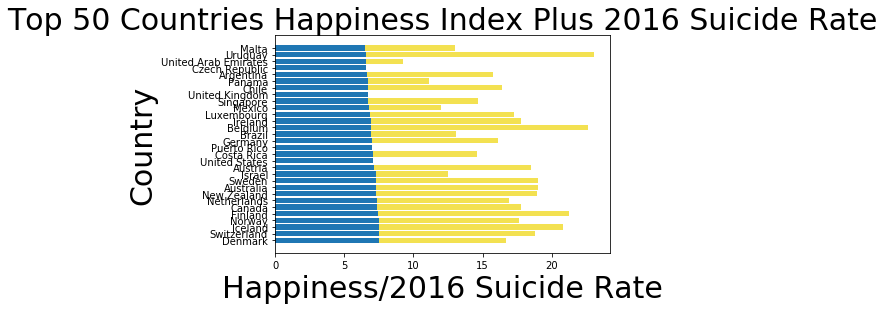

In [13]:
# # Calculate total population suicide rate per country
# Avg_Suicide_Rate=suicide_df

# Horizontal stacked bar chart
top50_df= merged_df.loc[0:29]
low50_df=merged_df.loc[127:156]

top_Happy_Score=top50_df["Happiness Score"]
top_Suicide_Rate=top50_df["2016"]
topIndex=top50_df["Country"]

plt.barh(topIndex,top_Happy_Score)
plt.barh(topIndex,top_Suicide_Rate,left=top_Happy_Score,color="#f3e151")
plt.rcParams["figure.figsize"]=(20,20)
plt.title("Top 50 Countries Happiness Index Plus 2016 Suicide Rate",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.xlabel("Happiness/2016 Suicide Rate",fontsize=30)
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)
plt.savefig("Plot_1")
plt.show()

## Happiness Map
### Indicates happiness based on color intensity per country

In [14]:
# World Happiness Cartogram

filepath="Data/World_Countries.shp"

map_df=gpd.read_file(filepath)


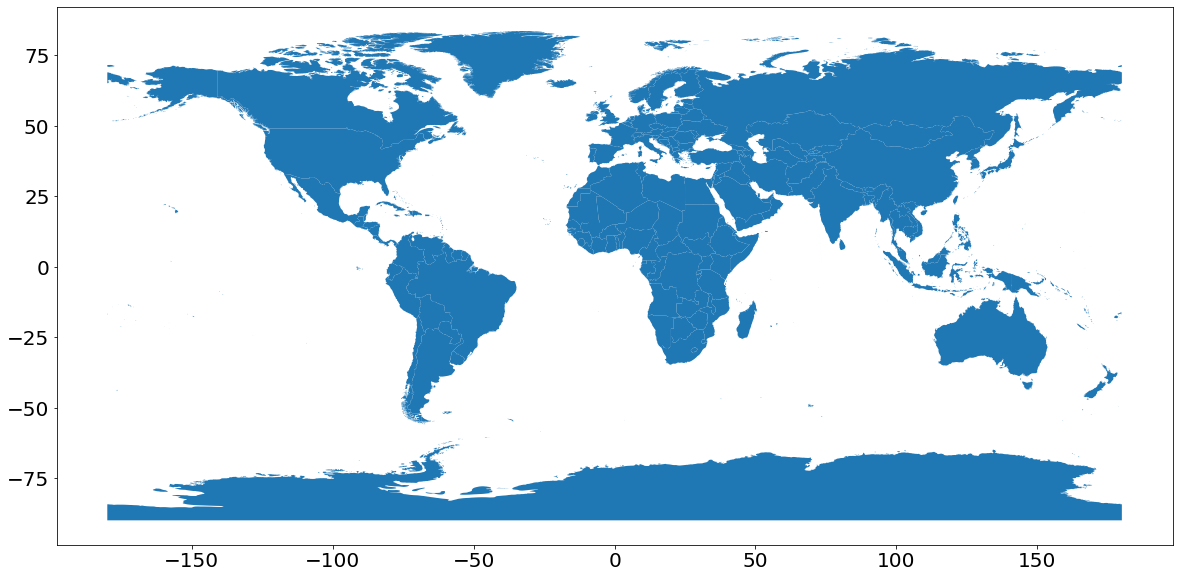

In [15]:
map_df.plot()

In [16]:
data_for_map = "Data/2016 World Happiness Report2.csv"

data_for_map = pd.read_csv(data_for_map)

data_for_map.head()

,COUNTRY,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [17]:
# join the geodataframe with the cleaned up csv dataframe

merged = pd.merge(map_df, data_for_map)
merged.head()

,COUNTRY,geometry,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
2,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",Central and Eastern Europe,81,5.291,5.226,5.356,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350
3,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
4,Armenia,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...",Central and Eastern Europe,121,4.360,4.266,4.454,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864


C:\Users\Brian\anaconda3\envs\GeoPandas\lib\site-packages\geopandas\plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


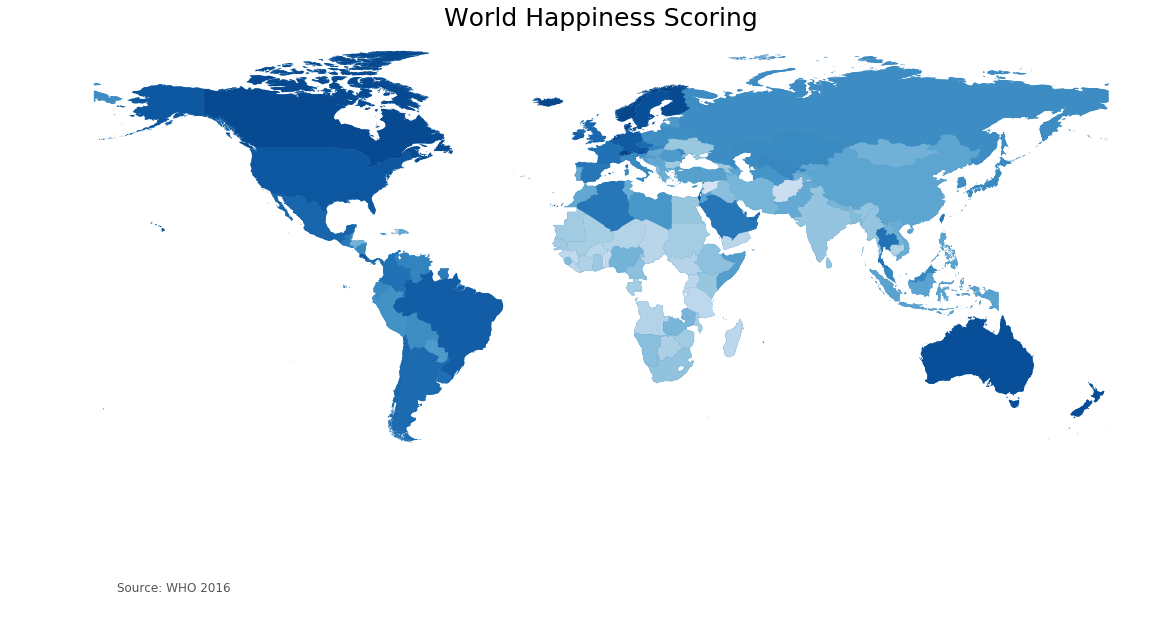

In [18]:
# create map

# set a variable that will call whatever column we want to visualise on the map

variable = "Happiness Score"

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(20, 12))
ax = merged.plot(axes=ax)
ax.set_axis_off()
# add a title
ax.set_title("World Happiness Scoring", fontdict={"fontsize": "25", "fontweight" : "3"})
# create an annotation for the data source
ax.annotate("Source: WHO 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")
# set the range for the choropleth
vmin, vmax = 2, 8
merged.plot(column=variable, cmap='Blues', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor=None)

## Happiness Index Breakdown by Indicator per Country

### Top 50 Countries

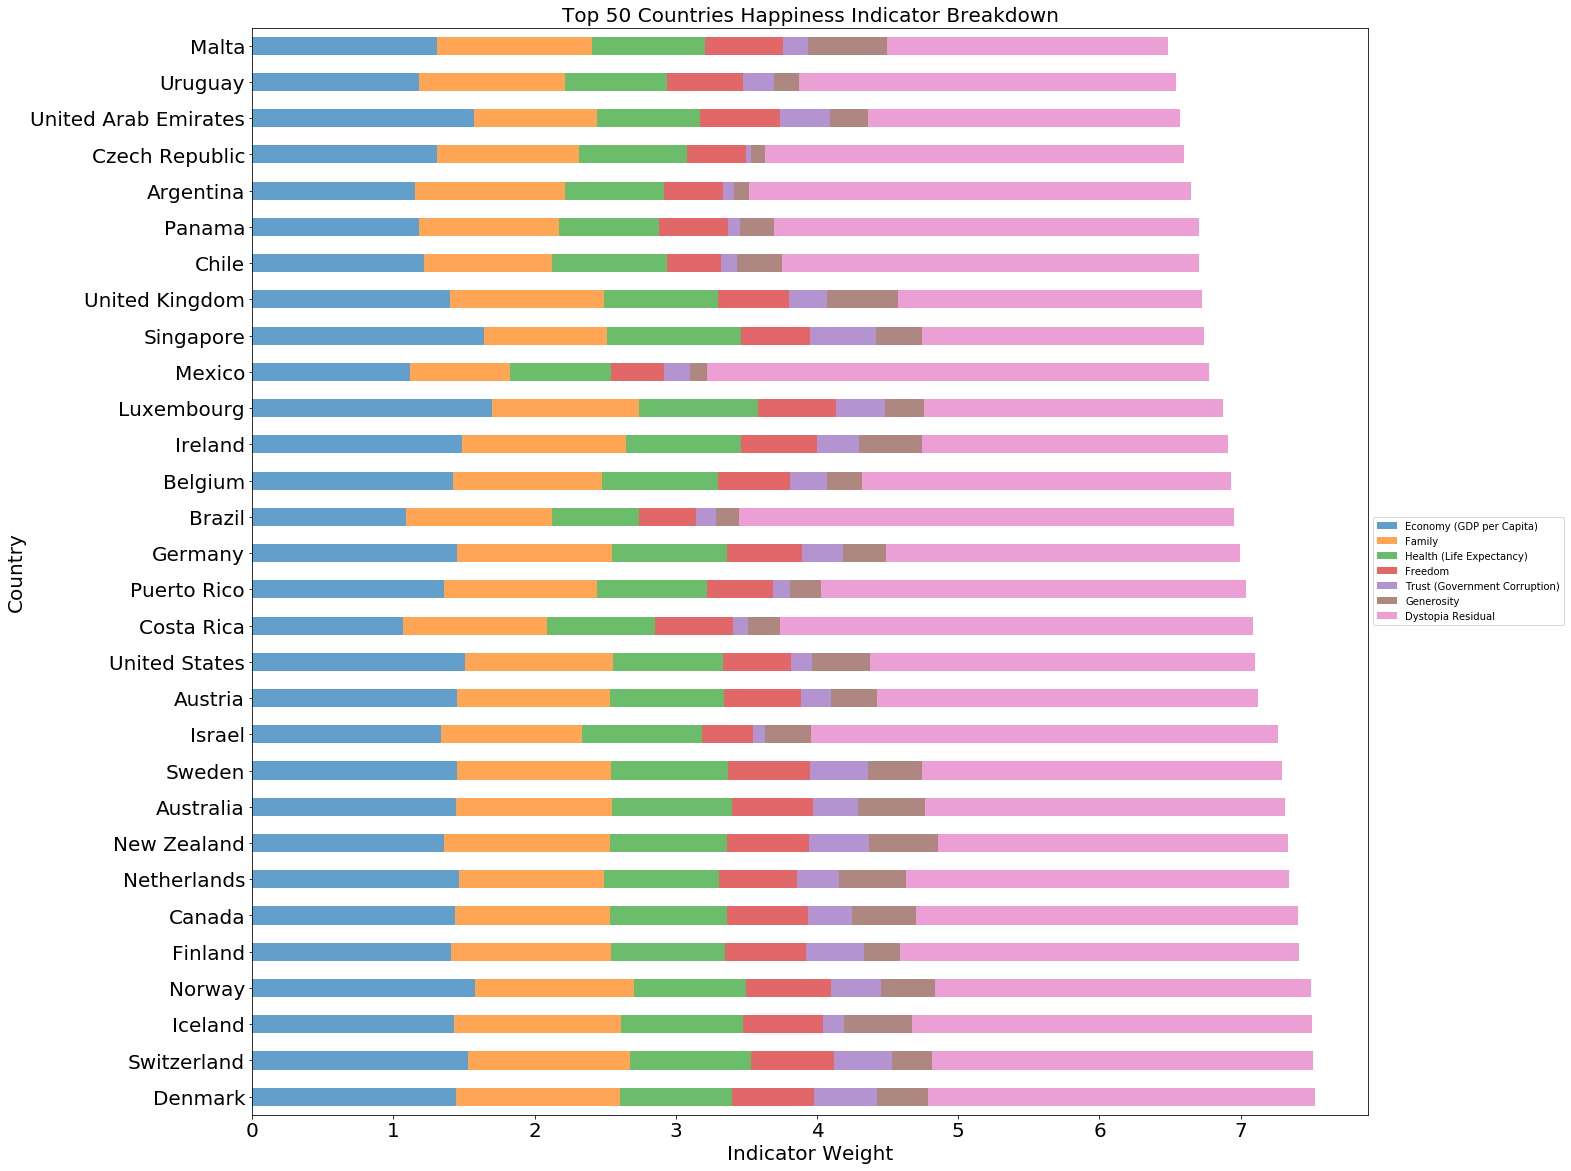

In [19]:
happiness_top50_df=top50_df[["Country","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
y=happiness_top50_df.set_index("Country")
y.plot.barh(stacked=True,alpha=0.7)
plt.title("Top 50 Countries Happiness Indicator Breakdown",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.xlabel("Indicator Weight",fontsize=20)
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.legend(loc="center left",prop={'size': 10},bbox_to_anchor=(1,0.5))
plt.savefig("Plot_2")

### Bottom 50 Countries

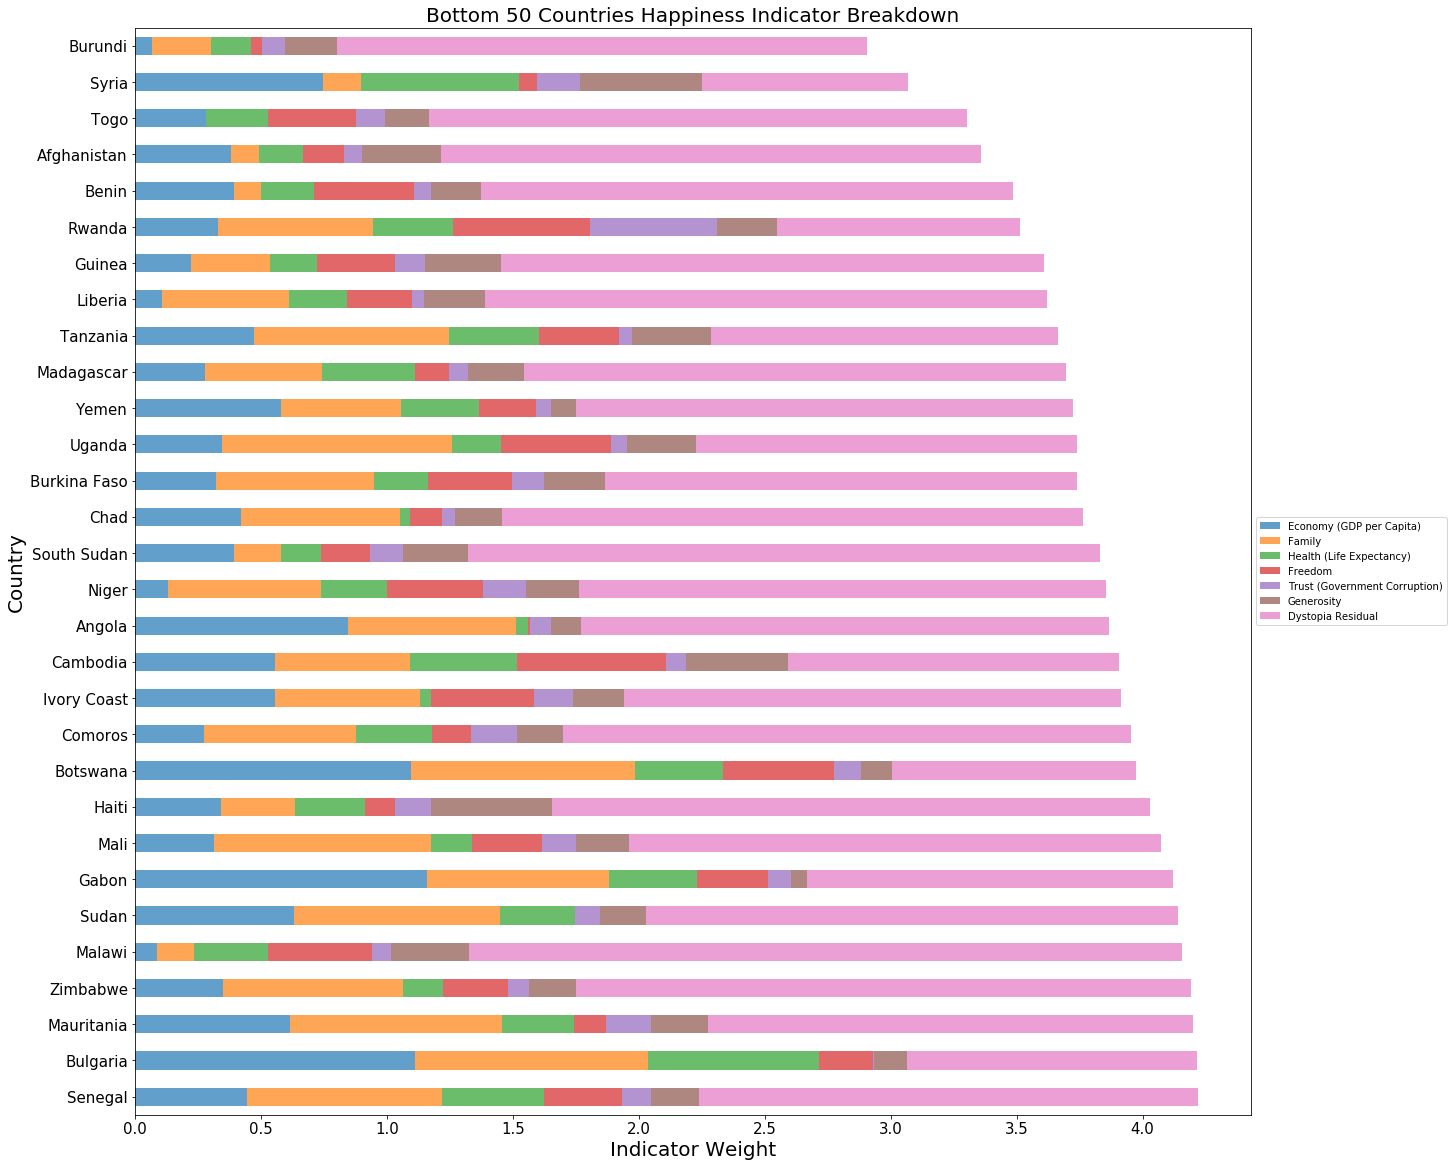

In [20]:
happiness_low50_df=low50_df[["Country","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]]
y=happiness_low50_df.set_index("Country")
y.plot.barh(stacked=True,alpha=0.7)
plt.title("Bottom 50 Countries Happiness Indicator Breakdown",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.xlabel("Indicator Weight",fontsize=20)
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.legend(loc="center left",prop={'size': 10},bbox_to_anchor=(1,0.5))
plt.savefig("Plot_3")

## All Countries Final Happiness vs. Suicide Rate Comparison

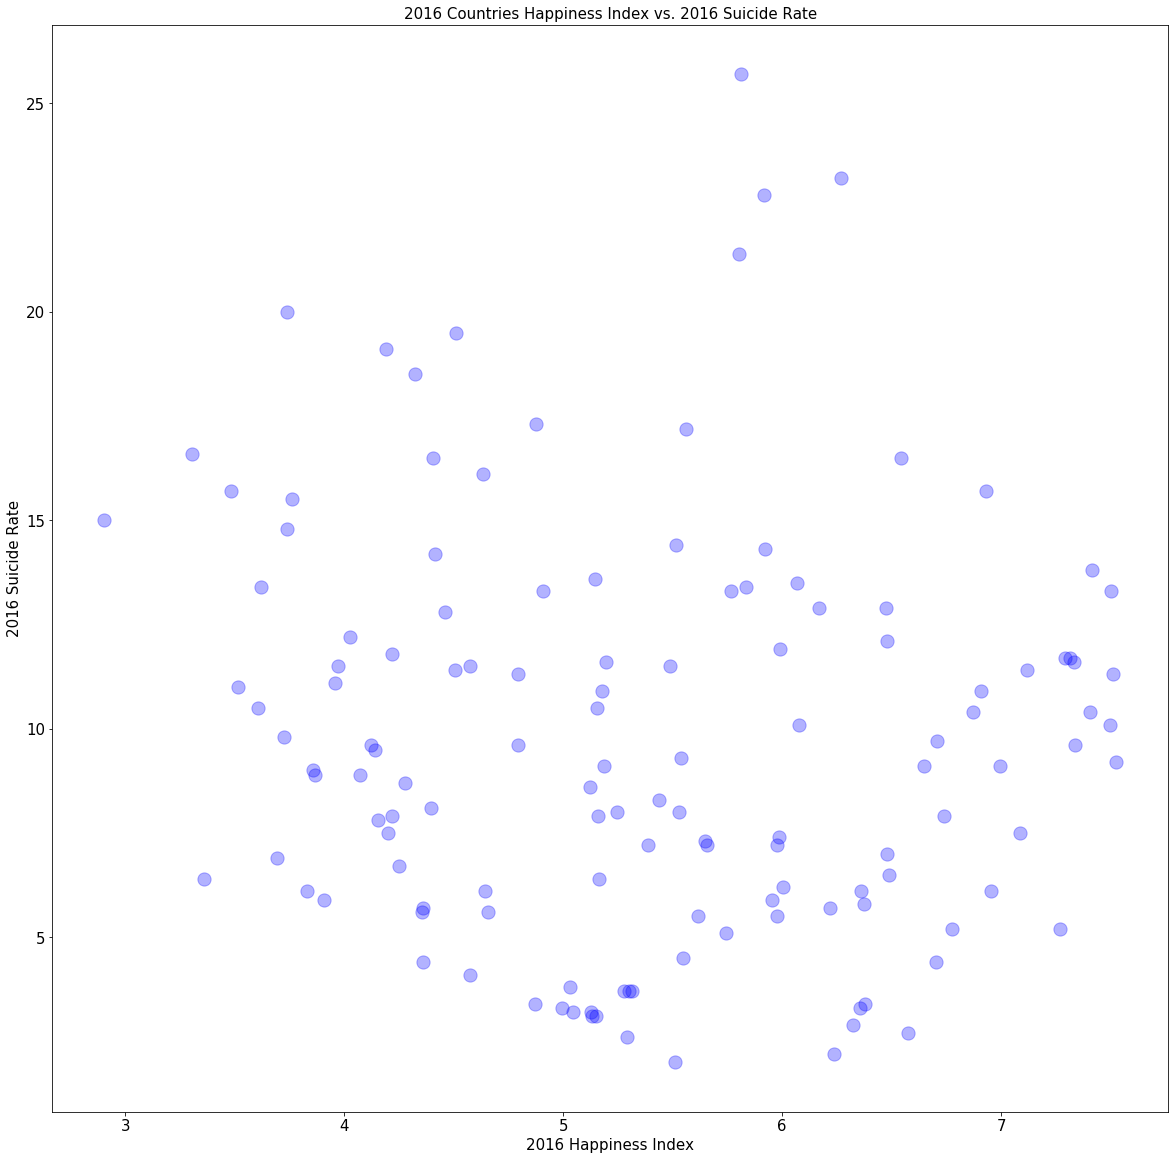

In [21]:
all_Happy_Score=merged_df["Happiness Score"]
all_Suicide_Rate=merged_df["2016"]
# s=np.random.random(157)

plt.scatter(all_Happy_Score,all_Suicide_Rate,alpha=0.3,s=175,c="blue")
plt.title("2016 Countries Happiness Index vs. 2016 Suicide Rate",fontsize=15)
plt.ylabel("2016 Suicide Rate",fontsize=15)
plt.xlabel("2016 Happiness Index",fontsize=15)
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.rcParams["figure.figsize"]=(10,10)
plt.savefig("Plot_4")
plt.show()